In [33]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
%matplotlib inline

In [34]:
data = pd.read_csv('dataset/acme-medical-charges.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [35]:
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Age

In [36]:
data['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [37]:
fig = px.histogram(
    data,
    x='age',
    marginal='box',
    nbins=47,
    title='Distribution of age'
)
fig.update_layout(bargap=0.1)
fig.show()

# plt.hist(data['age'], bins=100)
# plt.show()

#### BMI

In [38]:
print(data['bmi'].describe())

fig = px.histogram(
    data,
    x='bmi',
    marginal='box',
    color_discrete_sequence=['lightblue'],
    title='Distribution of BMI'
)
fig.update_layout(bargap=0.1)
fig.show()


count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


#### Charges

In [39]:
# charges <-> smokers
fig1 = px.histogram(
    data,
    x='charges',
    marginal='box',
    color='smoker',
    color_discrete_sequence=['red', 'lightgreen'],
    title='Annual medical charges'
)

fig1.update_layout(bargap=0.2)
fig1.show()

# charges <-> sex
fig2 = px.histogram(
    data,
    x='charges',
    marginal='box',
    color='sex',
    color_discrete_sequence=['blue', 'lightgreen'],
    title='Annual medical charges'
)
fig2.update_layout(bargap=0.5)
fig2.show()

# charges <-> sex
fig3 = px.histogram(
    data,
    x='charges',
    marginal='box',
    color='region',
    color_discrete_sequence=['gray', 'orange'],
    title='Annual medical charges'
)
fig3.update_layout(bargap=0.5)
fig3.show()

#### Smokers

In [49]:
# smoker <-> sex

fig1 = px.histogram(
    data,
    x='smoker',
    color='sex',
    color_discrete_sequence=['turquoise', 'lightpink'],
    title='Smoker vs Sex'
)

fig1.update_layout(bargap=0.1)
fig1.show()

# smoker <-> region
fig2 = px.histogram(
    data,
    x='smoker',
    color='region',
    color_discrete_sequence=['turquoise', 'blue'],
    title='Smoker vs Region'
)

fig2.update_layout(bargap=0.1)
fig2.show()


# smoker <-> children
fig3 = px.histogram(
    data,
    x='smoker',
    color='children',
    color_discrete_sequence=['lightblue', 'seagreen'],
    title='Smoker vs Children'
)

fig3.update_layout(bargap=0.1)
fig3.show()

### Age and Charges

In [41]:
fig = px.scatter(
    data,
    x='age',
    y='charges',
    color='smoker',
    opacity=0.8,
    hover_data=['sex'],
    title='Age vs Charges'
)
fig.update_traces(marker_size=5)
fig.show()

#### BMI and Charges

In [42]:
fig = px.scatter(
    data,
    x='bmi',
    y='charges',
    color='smoker',
    hover_data=['age', 'sex'],
    title='BMI vs Charges'
)
fig.update_layout(bargap=0.2)
fig.update_traces(marker_size=5)
fig.show()

In [50]:
# violin is for categorical data

fig = px.violin(
    data,
    x='children',
    y='charges',
    hover_data=['age', 'sex'],
    title='Children vs Charges'
)
fig.update_layout(bargap=0.2)
fig.update_traces(marker_size=5)
fig.show()

In [44]:
fig = px.violin(
    data,
    x='region',
    y='charges',
    hover_data=['age', 'sex'],
    title='Region vs Charges'
)
fig.update_layout(bargap=0.2)
fig.update_traces(marker_size=5)
fig.show()

#### Correlation of coefficients

In [45]:
print(data.info())
children_charges = data['charges'].corr(data['children'])
age_charges = data['charges'].corr(data['age'])
bmi_charges = data['charges'].corr(data['bmi'])

print(f'charges correlation with children: {children_charges}')
print(f'charges correlation with age: {age_charges}')
print(f'charges correlation with bmi: {bmi_charges}')




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
charges correlation with children: 0.0679982268479047
charges correlation with age: 0.2990081933306476
charges correlation with bmi: 0.1983409688336288


Compute correlation with categorical data

In [51]:
smokerValues = { 'no': 0, 'yes': 1 }
smokerNumeric = data['smoker'].map(smokerValues)
smoker_charges = data['charges'].corr(smokerNumeric)

sexValues = { 'female': 0, 'male': 1 }
sexNumeric = data['sex'].map(sexValues)
sex_charges = data['charges'].corr(sexNumeric)

regionValues = { 'southwest': 0, 'southeast': 1, 'northeast': 2, 'northwest': 3 }
regionNumeric = data['region'].map(regionValues)
region_charges = data['charges'].corr(regionNumeric)


print(f'charges correlation with smokers: {smoker_charges}')
print(f'charges correlation with sex: {sex_charges}')
print(f'charges correlation with region: {region_charges}')


charges correlation with smokers: 0.7872514304984785
charges correlation with sex: 0.05729206220202527
charges correlation with region: -0.011740854806590257


In [47]:
# correlation with age is 0.2990081933306476
agefig = px.scatter(
    data,
    x='age',
    y='charges',
    color='charges',
    color_discrete_sequence=['red']
)
agefig.show()

# charges correlation with bmi: 0.1983409688336288
bmifig = px.scatter(
    data,
    x='bmi',
    y='charges',
    opacity=0.6,
    color_discrete_sequence=['black']
)
bmifig.show()

# charges correlation with children: 0.0679982268479047
childfig = px.scatter(
    data,
    x='children',
    y='charges',
    opacity=0.6,
    color='children',
    color_discrete_sequence=['green']
)
childfig.show()

# charges correlation with smokers: 0.7872514304984785
smokerfig = px.histogram(
    data,
    x='smoker',
    y='charges',
    opacity=0.6,
    color='children',
    color_discrete_sequence=['green', 'red']
)
smokerfig.show()




#### all correlation between datas

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


Text(0.5, 1.0, 'Correlation matrix')

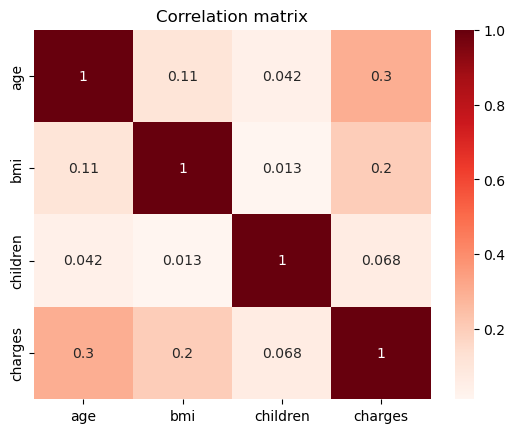

In [52]:
all_corr = data[['age', 'bmi', 'children', 'charges']].corr(method='pearson')
print(all_corr)
# headmap
sns.heatmap(all_corr, cmap='Reds', annot=True)
plt.title('Correlation matrix')

Smokers and age columns have a strong correlation with charges

In [66]:
nonSmokerData = data[data['smoker'] == 'no']
maleData = data[data['sex'] == 'male']
femaleData = data[data['sex'] == 'female']

<Axes: title={'center': 'age vs charges'}, xlabel='age', ylabel='charges'>

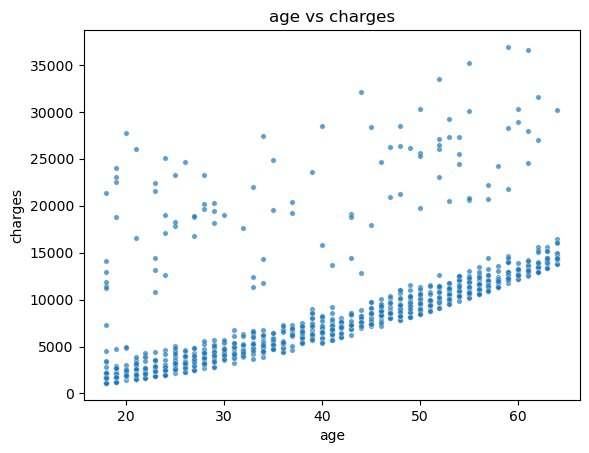

In [67]:
plt.title('age vs charges')
sns.scatterplot(data=nonSmokerData, x='age', y='charges', alpha=0.7, s=15)

##### Model

In [113]:
# w -> weight -> slope -> m
# b -> bias -> c
# linear model => y = mx + c

def estimate_charges(age, w, b):
    return (w * age) + b

w = 50
b = 100

# ages of non smokers
nonSmokerAges = nonSmokerData['age']
estimated_charges = estimate_charges(nonSmokerAges, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [70]:
nonSmokerData.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'charges')

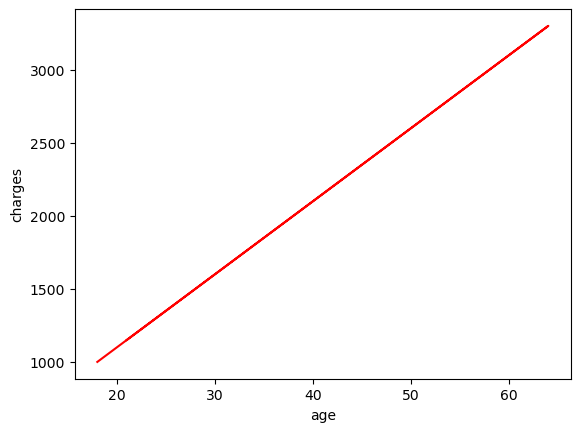

In [71]:
plt.plot(nonSmokerAges, estimated_charges, 'r-')
plt.xlabel('age')
plt.ylabel('charges')

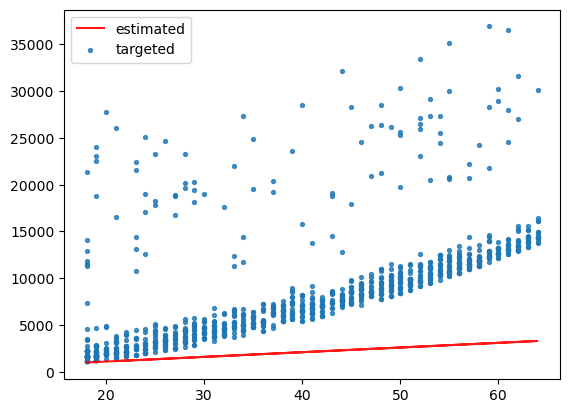

In [72]:
target = nonSmokerData['charges']

plt.plot(nonSmokerAges, estimated_charges, 'r', alpha=0.9)

plt.scatter(nonSmokerAges, target, s=8, alpha=0.8)
plt.legend(['estimated', 'targeted'])

In [82]:
def try_parameter(w, b):
    ages = nonSmokerData['age']
    target = nonSmokerData['charges']

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimated', 'Targeted'])

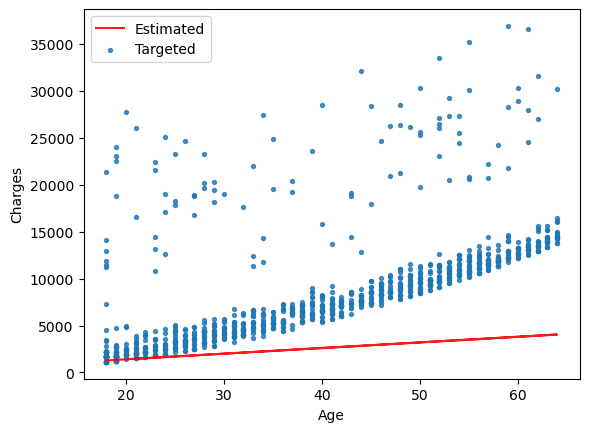

In [83]:
try_parameter(60, 200)

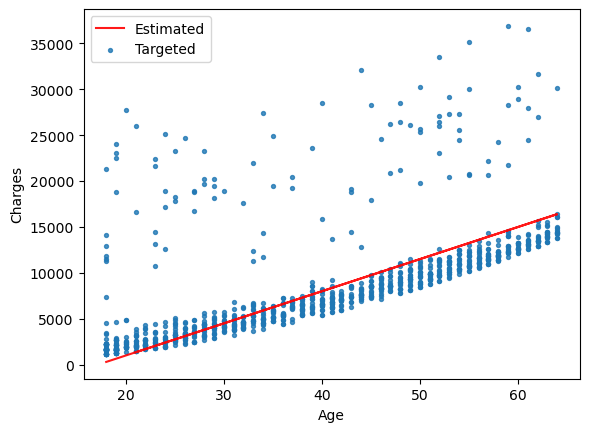

In [109]:
try_parameter(350, -6000)

##### Loss/Cost function

* calculate the difference between the target and the prediction/estimated values

* square all the elements to remove the negatives
* calculate the average of the element in the result
* take the square root of the result

In [114]:
def rmse(target, predictions):
    return np.sqrt(np.mean(np.square(target - predictions)))

In [116]:
def try_parameter(w, b):
    ages = nonSmokerData['age']
    target = nonSmokerData['charges']

    estimated_charges = estimate_charges(ages, w, b)
    print(f'RMSE loss: {rmse(target, estimated_charges)}')
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimated', 'Targeted'])

RMSE loss: 4820.085673437383


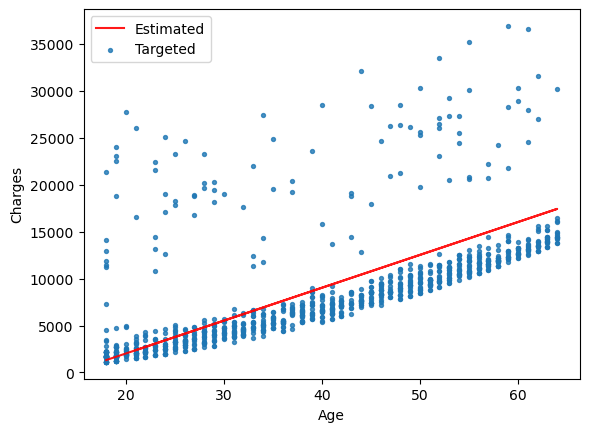

In [123]:
w = 350
b = -4980

targets = nonSmokerData['charges']
predicted = estimate_charges(nonSmokerData['age'], w, b)

try_parameter(w, b)

##### Linear regression with SciKit-learn

In [137]:
from sklearn.linear_model import LinearRegression

inputs = nonSmokerData[['age']]
targets = nonSmokerData['charges']

print(f'inputs.shape: {inputs.shape}')
print(f'targets.shape: {targets.shape}')

model = LinearRegression()
model.fit(inputs, targets)

demoage = np.array([
    [23],
    [37],
    [61]
])

model.predict(demoage)

inputs.shape: (1064, 1)
targets.shape: (1064,)


/home/sudiptoshahin/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [138]:
predictions = model.predict(inputs)

predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [139]:
rmse(targets, predictions)

4662.505766636395

The parameter's of the mode are stored in the coef_ and intercept_ properties.

In [140]:
# w or m
model.coef_

array([267.24891283])

In [141]:
model.intercept_

-2091.4205565650827

RMSE loss: 4662.505766636395


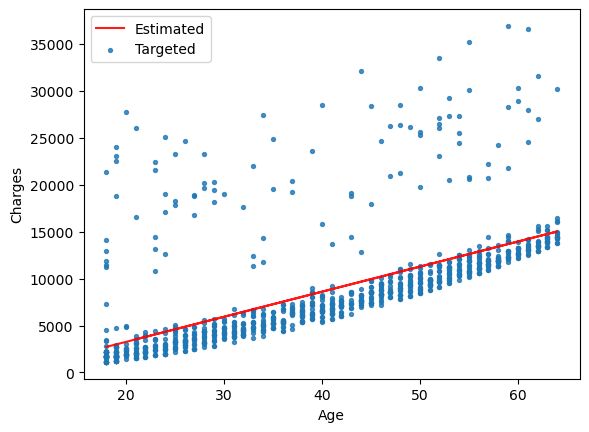

In [142]:
try_parameter(model.coef_, model.intercept_)

##### SGD regressor

In [143]:
# loss function
rmse(targets, predictions)

4662.505766636395

RMSE loss: 4830.824637872432


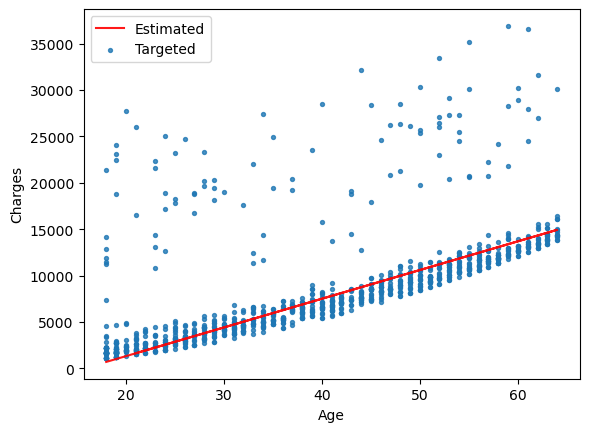

In [204]:
from sklearn.linear_model import SGDRegressor

sqrError = rmse(targets, predictions)

sgdregressor = SGDRegressor(
    penalty='l2',
    alpha=0.01,
    fit_intercept=True,
    max_iter=1500,
    epsilon=0.1,
)

sgdregressor.fit(inputs, targets)
sgdpredict = sgdregressor.predict(inputs)

# sgdregressor.coef_
# sgdregressor.intercept_

try_parameter(sgdregressor.coef_, sgdregressor.intercept_)

In [166]:
sgdregressor.predict(np.array([[30]]))

/home/sudiptoshahin/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([4014.3438066])

#### For smokers charges

In [198]:
def try_parameter_smoker(data, w, b):
    ages = data['age']
    target = data['charges']

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimated', 'Targeted'])

predicted

[30389.36142919 37615.91832978 39639.35426195 34725.29556955
 33569.04646545]
actual

[19719.6947  27218.43725 29330.98315 44202.6536  19798.05455]


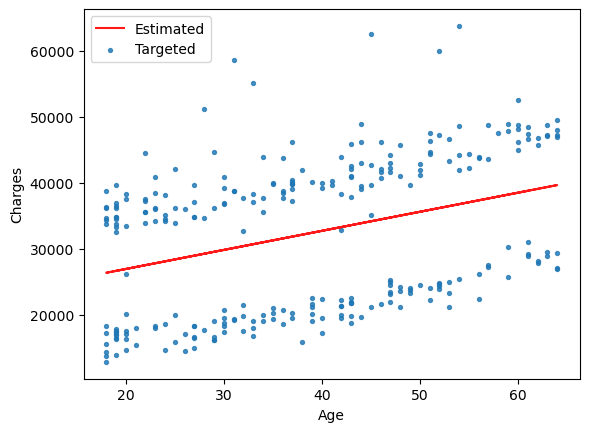

In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

smokersData = data[data['smoker'] == 'yes']

X = smokersData[['age']]
y = smokersData['charges']

X_train = X.iloc[: 174]
y_train = y.iloc[: 174]

X_pred = X.iloc[174: ]
y_pred = y.iloc[174: ].to_numpy()

lrModel = LinearRegression()
lrModel.fit(X_train, y_train)

pred1 = lrModel.predict(X_pred)

print('predicted\n')
print(pred1[:5])

print('actual\n')
print(y_pred[:5])

try_parameter_smoker(smokersData, lrModel.coef_, lrModel.intercept_)



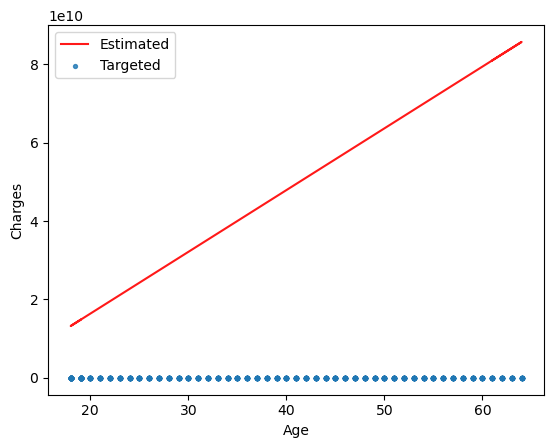

In [215]:


sgd = SGDRegressor(
    penalty='l2',
    alpha=0.3,
    fit_intercept=True,
    max_iter=1500,
    epsilon=0.1,
)

sgd.fit(X_train, y_train)
sgdpredict = sgd.predict(X_pred)

try_parameter_smoker(data, sgd.coef_, sgd.intercept_)

#### Linear regression multiple feature

In [218]:
from sklearn.linear_model import LinearRegression

inputs = nonSmokerData[['age', 'bmi']]
targets = nonSmokerData['charges']

model = LinearRegression()
model.fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss: ', loss)

Loss:  4662.3128354612945


Correlation with non smokers charges and age, bmi

In [220]:
print(nonSmokerData['charges'].corr(nonSmokerData['bmi']))
print(nonSmokerData['charges'].corr(nonSmokerData['age']))

0.08403654312833271
0.627946783766419


In [221]:
fig = px.scatter(
    nonSmokerData, 
    x='bmi',
    y='charges',
    title='BMI vs Charges',
    opacity=0.8
)
fig.update_traces(marker_size=5)
fig.show()

In [224]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488672)